In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.tree import export_graphviz

import graphviz

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

In [2]:
# 한글출력
import matplotlib
import matplotlib.font_manager as fm

font_location = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'
font_name = fm.FontProperties(fname = font_location).get_name()
matplotlib.rc('font',family = font_name)

In [10]:
import numpy as np

In [20]:
df_raw = pd.read_csv('체질검사.csv', encoding = 'cp949')
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT', axis = 1, inplace = False)


In [21]:
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print("train data X size : {}".format(df_train_x.shape))
print("train data Y size : {}".format(df_train_y.shape))
print("test data X size : {}".format(df_test_x.shape))
print("test data Y size : {}".format(df_test_x.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76, 13)


In [28]:
tree_uncustomized = DecisionTreeRegressor(random_state = 1234)
tree_uncustomized.fit(df_train_x, df_train_y)
# training data 설명력
print("Score on training set : {:.3f}".format(tree_uncustomized.score(df_train_x, df_train_y)))
# test data 설명력
print("Score on test set : {:.3f}".format(tree_uncustomized.score(df_test_x, df_test_y)))
print("해석 : train 100%, test 29%로 train 데이터에 과적합")

Score on training set : 1.000
Score on test set : 0.295
해석 : train 100%, test 29%로 train 데이터에 과적합


In [29]:
# train, test 설명력 결과 저장
train_score = []; test_score = []
# min_samples_leaf : 잎사귀 최소 자료 수??
para_leaf = [n_leaf * 1 for n_leaf in range(1,20)]

for v_min_samples_leaf in para_leaf:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = v_min_samples_leaf)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 결과저장
df_score_leaf = pd.DataFrame()
df_score_leaf['MinSamplesLeaf'] = para_leaf
df_score_leaf['TrainScore'] = train_score
df_score_leaf['TestScore'] = test_score

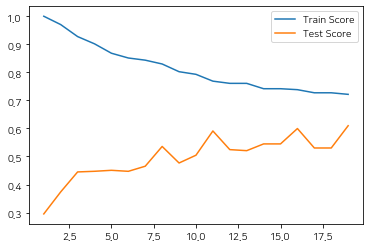

In [32]:
# 모델 설명력 확인
df_score_leaf.round(3)

# 모델 설명력 그래프 확인
plt.plot(para_leaf, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_leaf, test_score, linestyle = "-", label = "Test Score")
plt.legend()
plt.show()

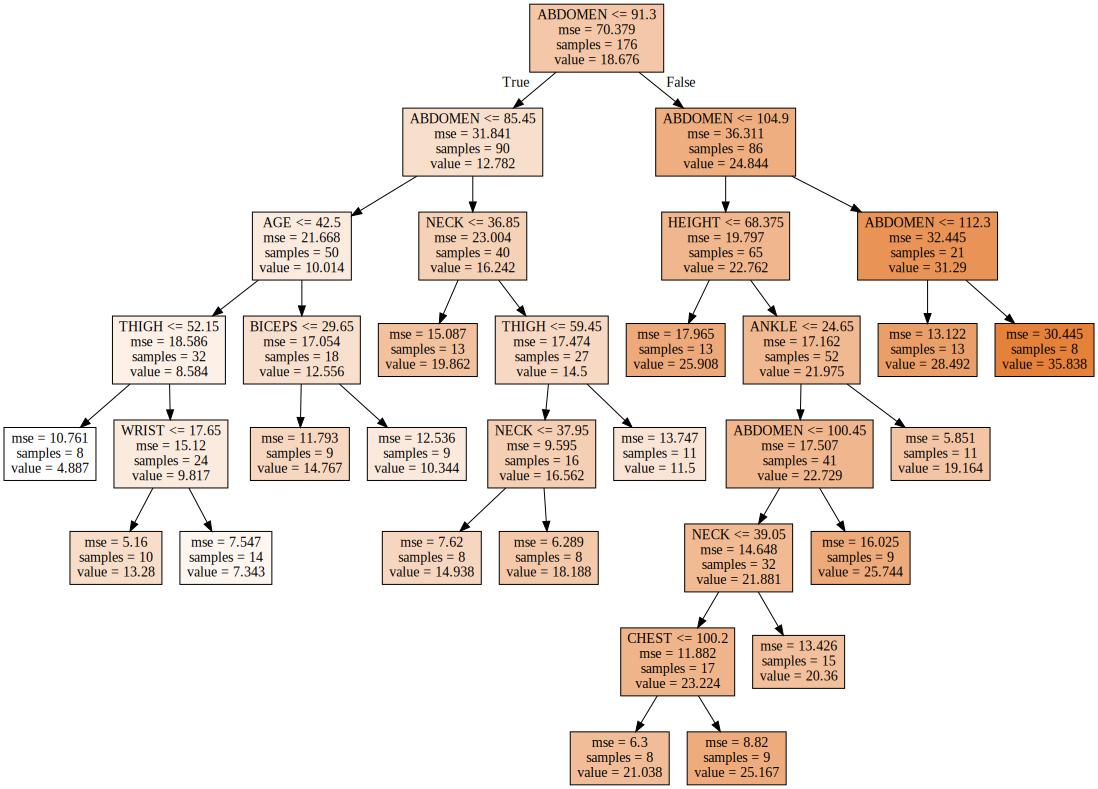

In [35]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료 수 = 8 모델
tree_graph  = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True,
               filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

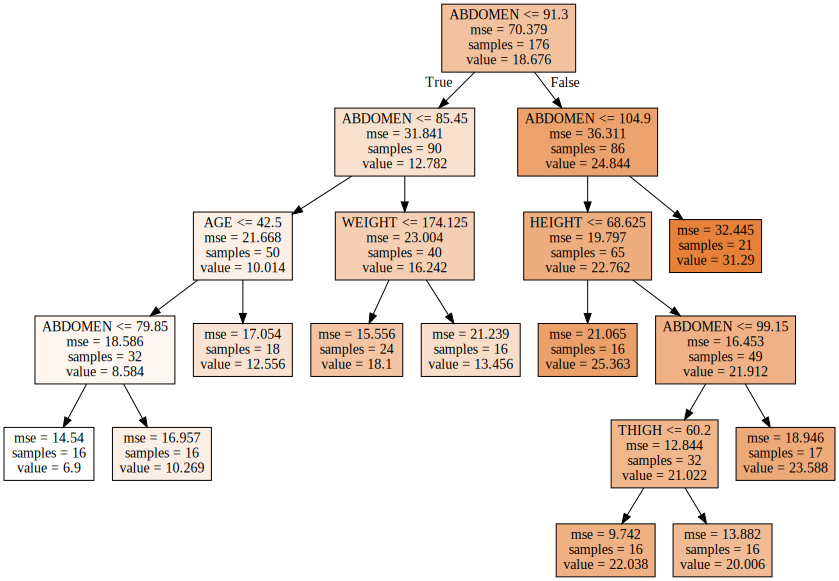

In [37]:
# 변수명 저장
v_feature_name = df_train_x.columns
# 노드의 최소 자료 수 = 8 모델
tree_graph  = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 16)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, impurity = True,
               filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 잎 노드의 최소 자료수 변경에 따른 모델 성능 : 자료수 8이 균형적으로 분리

In [40]:
test_score = []; train_score = []
para_split = [n_split * 2 for n_split in range(2,20)]

for v_min_samples_split in para_split:
    tree = DecisionTreeRegressor(random_state = 1234, min_samples_leaf = 8,
                                 min_samples_split = v_min_samples_split)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

df_score_split = pd.DataFrame()
df_score_split['MinSampleSplit'] = para_split
df_score_split['TrainScore'] = train_score
df_score_split['TestScore'] = test_score

In [41]:
df_score_split

,MinSampleSplit,TrainScore,TestScore
0,4,0.829787,0.535781
1,6,0.829787,0.535781
2,8,0.829787,0.535781
3,10,0.829787,0.535781
4,12,0.829787,0.535781
5,14,0.829787,0.535781
6,16,0.829787,0.535781
7,18,0.820546,0.557004
8,20,0.813441,0.581442
9,22,0.791871,0.567464


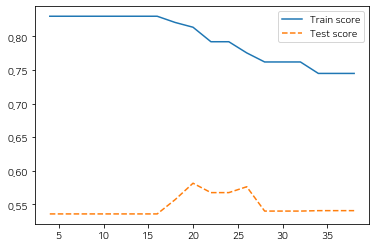

In [42]:
plt.plot(para_split, train_score, linestyle = "-", label = "Train score")
plt.plot(para_split, test_score, linestyle = "--", label = "Test score")
plt.legend()

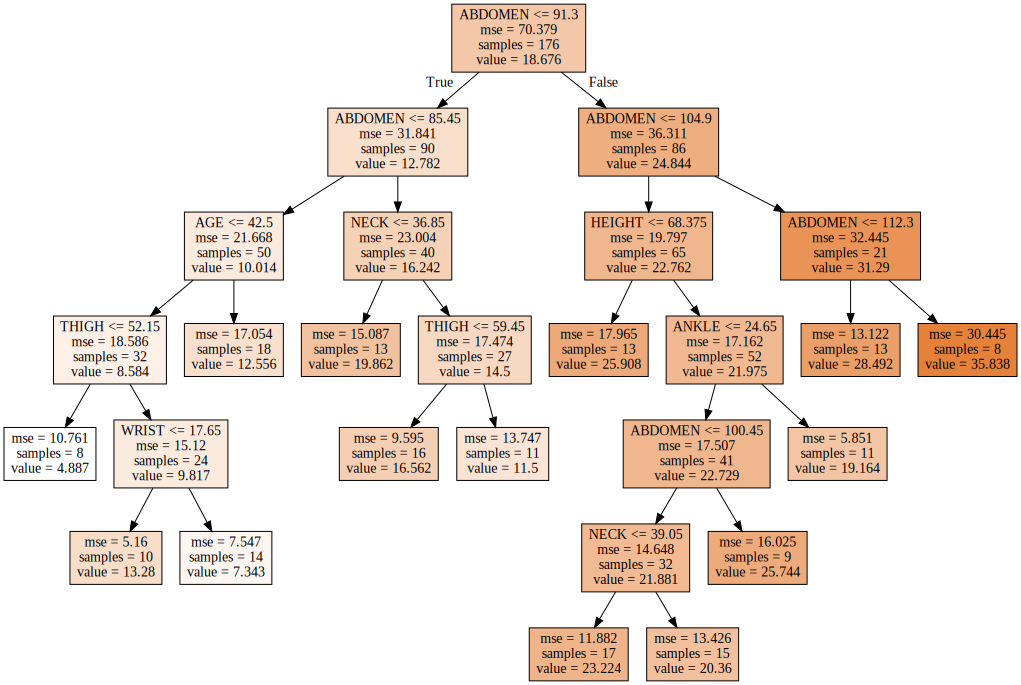

In [44]:
# 분리 노드의 최소 자료 수 = 8 모델
tree_graph  = DecisionTreeRegressor(random_state = 1234,
                                    min_samples_leaf = 8,
                                   min_samples_split = 20) # 과대적합 방지를 위해 train, test 갭이 가장 작은 수로 선택
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, 
                impurity = True,
               filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

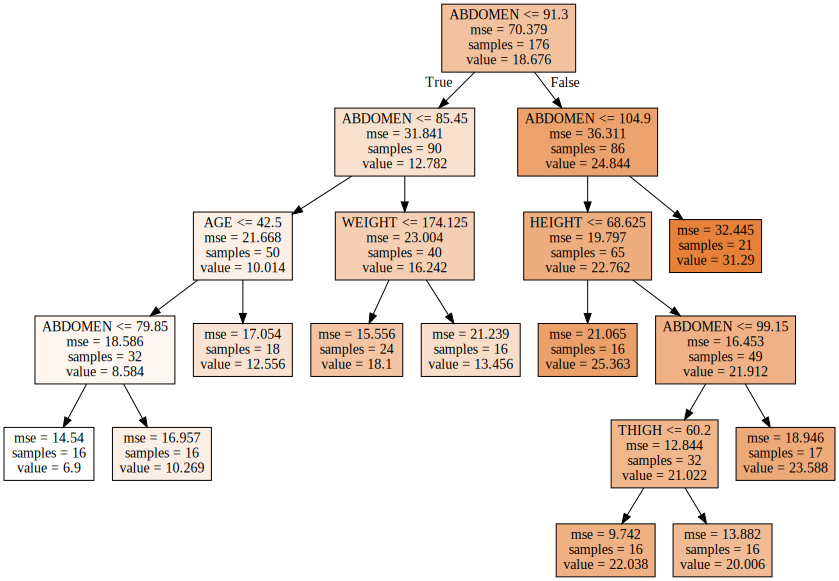

In [45]:
# 분리 노드의 최소 자료 수 = 8 모델
tree_graph  = DecisionTreeRegressor(random_state = 1234,
                                    min_samples_leaf = 16,
                                   min_samples_split = 26)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph, out_file = "tree_leaf.dot",
               feature_names = v_feature_name, 
                impurity = True,
               filled = True)
with open("tree_leaf.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

In [50]:
# train 및 test 설명력 결과 저장
train_score = []; test_score = []
# max_depth : 최대 깊이 변경
para_depth = [depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree = DecisionTreeRegressor(random_state = 1234,
                                min_samples_leaf = 8,
                                min_samples_split = 20,
                                max_depth = v_max_depth)
    tree.fit(df_train_x, df_train_y)
    train_score.append(tree.score(df_train_x, df_train_y))
    test_score.append(tree.score(df_test_x, df_test_y))

# 데이터 테이블로 저장
df_score_depth = pd.DataFrame()
df_score_depth['Depth'] = para_depth
df_score_depth['TrainScore'] = train_score
df_score_depth['TestScore'] = test_score

In [51]:
df_score_depth.round(3)

,Depth,TrainScore,TestScore
0,1,0.517,0.333
1,2,0.679,0.569
2,3,0.749,0.538
3,4,0.783,0.570
4,5,0.808,0.581
5,6,0.813,0.581
6,7,0.813,0.581
7,8,0.813,0.581
8,9,0.813,0.581
9,10,0.813,0.581


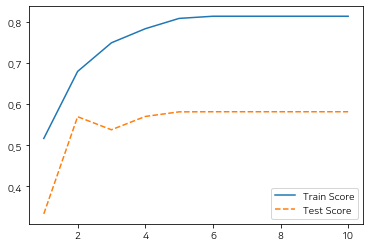

In [52]:
# p 178
plt.plot(para_depth, train_score, linestyle = "-", label = "Train Score")
plt.plot(para_depth, test_score, linestyle = "--", label = "Test Score")
plt.legend()

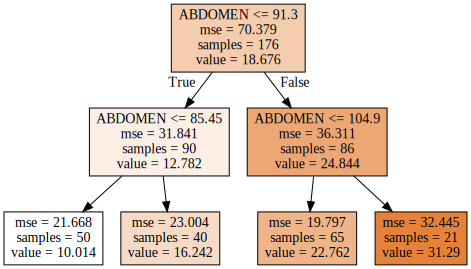

In [55]:
tree_graph = DecisionTreeRegressor(random_state = 1234,
                                  min_samples_leaf = 8,
                                  min_samples_split = 20,
                                  max_depth = 2)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph,
               out_file = "tree_depth.dot",
               feature_names = v_feature_name,
               impurity = True,
               filled = True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

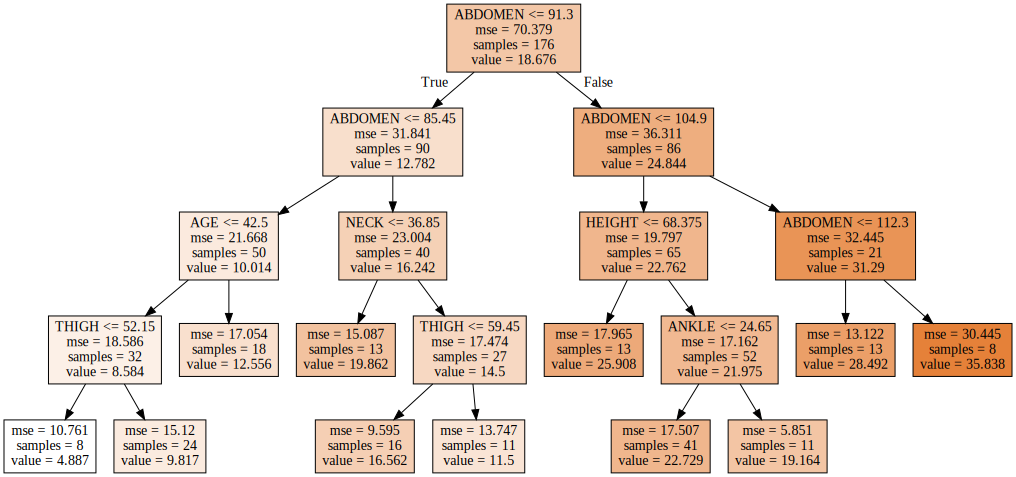

In [56]:
tree_graph = DecisionTreeRegressor(random_state = 1234,
                                  min_samples_leaf = 8,
                                  min_samples_split = 20,
                                  max_depth = 4)
tree_graph.fit(df_train_x, df_train_y)

export_graphviz(tree_graph,
               out_file = "tree_depth.dot",
               feature_names = v_feature_name,
               impurity = True,
               filled = True)
with open("tree_depth.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [58]:
tree_final = DecisionTreeRegressor(min_samples_leaf = 8,
                                  min_samples_split = 20,
                                  max_depth = 4,
                                  random_state = 1234)
tree_final.fit(df_train_x, df_train_y)

DecisionTreeRegressor(criterion='mse', max_depth=4, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=8,
                      min_samples_split=20, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=1234, splitter='best')

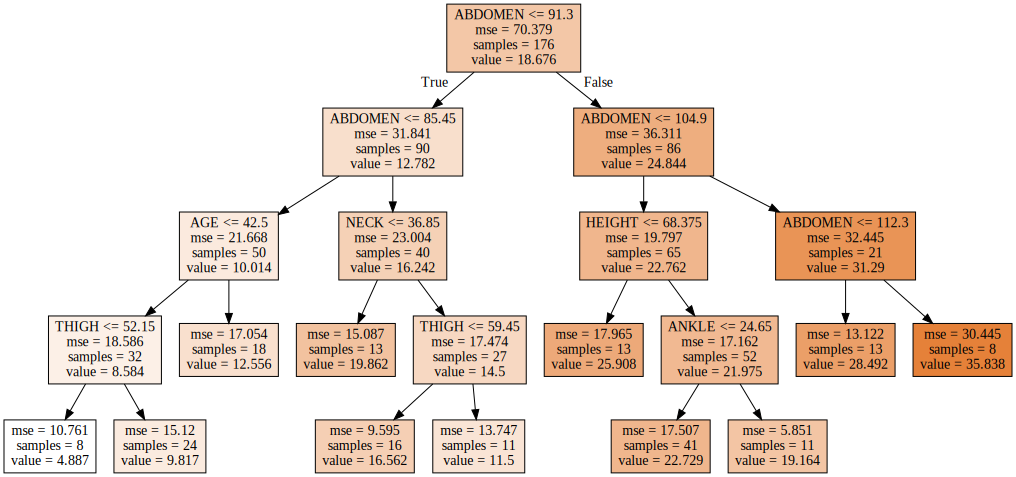

In [60]:
export_graphviz(tree_final, out_file = "tree_final.dot",
               feature_names = v_feature_name, impurity = True, filled = True)
with open("tree_final.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [61]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
df_importance = pd.DataFrame()
df_importance['Feature'] = v_feature_name
df_importance['Importance'] = tree_final.feature_importances_

# df_feature_importance의 테이블을 중요도별로 정렬
df_importance.sort_values('Importance', ascending = False, inplace = True)
df_importance.round(3)

,Feature,Importance
5,ABDOMEN,0.895
7,THIGH,0.032
3,NECK,0.026
0,AGE,0.019
2,HEIGHT,0.017
9,ANKLE,0.011
1,WEIGHT,0.000
4,CHEST,0.000
6,HIP,0.000
8,KNEE,0.000


Text(0, 0.5, '변수')

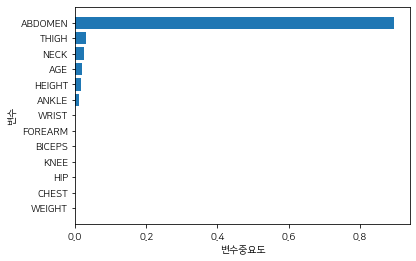

In [65]:
df_importance.sort_values('Importance', ascending = True, inplace = True)
coordinates = range(len(df_importance))
plt.barh(y = coordinates, width = df_importance['Importance'])
plt.yticks(coordinates, df_importance['Feature'])
plt.xlabel("변수중요도")
plt.ylabel("변수")

In [70]:
estimator = DecisionTreeRegressor()

param_grid = {"criterion" : ["mse", "friedman_mse","mae"],
             "max_features" : ["auto","sqrt","log2"],
             "min_samples_leaf" : para_leaf,
             "min_samples_split" : para_split}
grid_dt = GridSearchCV(estimator, param_grid, scoring = "r2",
                      n_jobs = -1)
grid_dt.fit(df_train_x, df_train_y)

print("best estimator model :\n{}".format(grid_dt.best_estimator_))
print("\nbest parameter : \n{}".format(grid_dt.best_params_))
print("\nbest score : \n{}".format(grid_dt.best_score_.round(3)))

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


best estimator model :
DecisionTreeRegressor(criterion='mae', max_depth=None, max_features='auto',
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=17,
                      min_samples_split=6, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

best parameter : 
{'criterion': 'mae', 'max_features': 'auto', 'min_samples_leaf': 17, 'min_samples_split': 6}

best score : 
0.636


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
